In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import numpy as np
import json
import folium
import urllib.request 
import seaborn as sns

# Préparation du dataframe

In [2]:
df = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/90a98de0-f562-4328-aa16-fe0dd1dca60f',sep='|',dtype='str')

In [3]:
df.head(5)

,Code service sages,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,07/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1061
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,02/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,BT,NaN,85
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,02/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1115
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,02/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1940
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,02/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1148


In [4]:
df.shape

(3509085, 43)

In [5]:
df.isnull().sum()

Code service sages            3509085
Reference document            3509085
1 Articles CGI                3509085
2 Articles CGI                3509085
3 Articles CGI                3509085
4 Articles CGI                3509085
5 Articles CGI                3509085
No disposition                      0
Date mutation                       0
Nature mutation                     0
Valeur fonciere                 49888
No voie                       1398616
B/T/Q                         3355288
Type de voie                  1458402
Code voie                       31974
Voie                            32010
Code postal                     32117
Commune                             0
Code departement                    0
Code commune                        0
Prefixe de section            3339067
Section                           110
No plan                             0
No Volume                     3499816
1er lot                       2412435
Surface Carrez du 1er lot     3221488
2eme lot    

In [6]:
colToDelete = []
for col in df.columns:
    if len(df[col].unique()) == 1:
        if df[col].unique()[0] == 'NULLCOL':
            colToDelete.append(col)

In [7]:
df = df.drop(columns=colToDelete)
df

,Code service sages,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,07/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1061
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,02/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,BT,NaN,85
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,02/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1115
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,02/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1940
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,02/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3509080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,16/12/2020,Vente,...,NaN,0,2,Appartement,NaN,29,2,S,NaN,447
3509081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,16/12/2020,Vente,...,NaN,0,2,Appartement,NaN,40,2,S,NaN,447
3509082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,16/12/2020,Vente,...,NaN,0,2,Appartement,NaN,24,1,S,NaN,447
3509083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,16/12/2020,Vente,...,NaN,0,2,Appartement,NaN,40,2,S,NaN,447


In [8]:
df.isnull().sum()

Code service sages            3509085
Reference document            3509085
1 Articles CGI                3509085
2 Articles CGI                3509085
3 Articles CGI                3509085
4 Articles CGI                3509085
5 Articles CGI                3509085
No disposition                      0
Date mutation                       0
Nature mutation                     0
Valeur fonciere                 49888
No voie                       1398616
B/T/Q                         3355288
Type de voie                  1458402
Code voie                       31974
Voie                            32010
Code postal                     32117
Commune                             0
Code departement                    0
Code commune                        0
Prefixe de section            3339067
Section                           110
No plan                             0
No Volume                     3499816
1er lot                       2412435
Surface Carrez du 1er lot     3221488
2eme lot    

In [9]:
df.shape

(3509085, 43)

In [10]:
df = df.drop_duplicates()

In [11]:
df.shape

(3365761, 43)

In [12]:
REGIONS = {
    'Auvergne-Rhône-Alpes': ['01', '03', '07', '15', '26', '38', '42', '43', '63', '69', '73', '74'],
    'Bourgogne-Franche-Comté': ['21', '25', '39', '58', '70', '71', '89', '90'],
    'Bretagne': ['35', '22', '56', '29'],
    'Centre-Val de Loire': ['18', '28', '36', '37', '41', '45'],
    'Corse': ['2A', '2B'],
    'Grand Est': ['08', '10', '51', '52', '54', '55', '57', '67', '68', '88'],
    'Guadeloupe': ['971'],
    'Guyane': ['973'],
    'Hauts-de-France': ['02', '59', '60', '62', '80'],
    'Île-de-France': ['75', '77', '78', '91', '92', '93', '94', '95'],
    'La Réunion': ['974'],
    'Martinique': ['972'],
    'Normandie': ['14', '27', '50', '61', '76'],
    'Nouvelle-Aquitaine': ['16', '17', '19', '23', '24', '33', '40', '47', '64', '79', '86', '87'],
    'Occitanie': ['09', '11', '12', '30', '31', '32', '34', '46', '48', '65', '66', '81', '82'],
    'Pays de la Loire': ['44', '49', '53', '72', '85'],
    'Provence-Alpes-Côte d\'Azur': ['04', '05', '06', '13', '83', '84'] }

In [13]:
def get_region(code_region):
    for key in REGIONS.keys():
        if code_region in REGIONS[key]:
            return key

In [14]:
df['Region'] = df['Code departement'].apply(get_region)
df

/var/folders/36/gfc6l00n2tj2hpqgm8k489pc0000gn/T/ipykernel_10590/4244642087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Region'] = df['Code departement'].apply(get_region)


,Code service sages,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Region
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,07/01/2020,Vente,...,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1061,Auvergne-Rhône-Alpes
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,02/01/2020,Vente,...,0,NaN,NaN,NaN,NaN,NaN,BT,NaN,85,Auvergne-Rhône-Alpes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,02/01/2020,Vente,...,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1115,Auvergne-Rhône-Alpes
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,02/01/2020,Vente,...,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1940,Auvergne-Rhône-Alpes
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,02/01/2020,Vente,...,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1148,Auvergne-Rhône-Alpes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3509079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,16/12/2020,Vente,...,0,2,Appartement,NaN,32,2,S,NaN,447,Île-de-France
3509080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,16/12/2020,Vente,...,0,2,Appartement,NaN,29,2,S,NaN,447,Île-de-France
3509081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,16/12/2020,Vente,...,0,2,Appartement,NaN,40,2,S,NaN,447,Île-de-France
3509082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,16/12/2020,Vente,...,0,2,Appartement,NaN,24,1,S,NaN,447,Île-de-France


In [15]:
df['Valeur fonciere'] = df['Valeur fonciere'].str.replace(',','.')
df

/var/folders/36/gfc6l00n2tj2hpqgm8k489pc0000gn/T/ipykernel_10590/2579721011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Valeur fonciere'] = df['Valeur fonciere'].str.replace(',','.')


,Code service sages,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Region
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,07/01/2020,Vente,...,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1061,Auvergne-Rhône-Alpes
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,02/01/2020,Vente,...,0,NaN,NaN,NaN,NaN,NaN,BT,NaN,85,Auvergne-Rhône-Alpes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,02/01/2020,Vente,...,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1115,Auvergne-Rhône-Alpes
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,02/01/2020,Vente,...,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1940,Auvergne-Rhône-Alpes
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,02/01/2020,Vente,...,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1148,Auvergne-Rhône-Alpes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3509079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,16/12/2020,Vente,...,0,2,Appartement,NaN,32,2,S,NaN,447,Île-de-France
3509080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,16/12/2020,Vente,...,0,2,Appartement,NaN,29,2,S,NaN,447,Île-de-France
3509081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,16/12/2020,Vente,...,0,2,Appartement,NaN,40,2,S,NaN,447,Île-de-France
3509082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,16/12/2020,Vente,...,0,2,Appartement,NaN,24,1,S,NaN,447,Île-de-France


In [16]:
def conv_float(col):
    if col == 'NULLCOL':
        return 0
    else :
        return float(col)

In [17]:
df['Valeur fonciere'] = df['Valeur fonciere'].apply(conv_float)
df['Valeur fonciere'] = df['Valeur fonciere'].astype(float)

/var/folders/36/gfc6l00n2tj2hpqgm8k489pc0000gn/T/ipykernel_10590/4293394751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Valeur fonciere'] = df['Valeur fonciere'].apply(conv_float)
/var/folders/36/gfc6l00n2tj2hpqgm8k489pc0000gn/T/ipykernel_10590/4293394751.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Valeur fonciere'] = df['Valeur fonciere'].astype(float)


In [18]:
DEPARTMENTS = {
    '01': 'Ain', 
    '02': 'Aisne', 
    '03': 'Allier', 
    '04': 'Alpes-de-Haute-Provence', 
    '05': 'Hautes-Alpes',
    '06': 'Alpes-Maritimes', 
    '07': 'Ardèche', 
    '08': 'Ardennes', 
    '09': 'Ariège', 
    '10': 'Aube', 
    '11': 'Aude',
    '12': 'Aveyron', 
    '13': 'Bouches-du-Rhône', 
    '14': 'Calvados', 
    '15': 'Cantal', 
    '16': 'Charente',
    '17': 'Charente-Maritime', 
    '18': 'Cher', 
    '19': 'Corrèze', 
    '2A': 'Corse-du-Sud', 
    '2B': 'Haute-Corse',
    '21': 'Côte-d\'Or', 
    '22': 'Côtes-d\'Armor', 
    '23': 'Creuse', 
    '24': 'Dordogne', 
    '25': 'Doubs', 
    '26': 'Drôme',
    '27': 'Eure', 
    '28': 'Eure-et-Loir', 
    '29': 'Finistère', 
    '30': 'Gard', 
    '31': 'Haute-Garonne', 
    '32': 'Gers',
    '33': 'Gironde', 
    '34': 'Hérault', 
    '35': 'Ille-et-Vilaine', 
    '36': 'Indre', 
    '37': 'Indre-et-Loire',
    '38': 'Isère', 
    '39': 'Jura', 
    '40': 'Landes', 
    '41': 'Loir-et-Cher', 
    '42': 'Loire', 
    '43': 'Haute-Loire',
    '44': 'Loire-Atlantique', 
    '45': 'Loiret', 
    '46': 'Lot', 
    '47': 'Lot-et-Garonne', 
    '48': 'Lozère',
    '49': 'Maine-et-Loire', 
    '50': 'Manche', 
    '51': 'Marne', 
    '52': 'Haute-Marne', 
    '53': 'Mayenne',
    '54': 'Meurthe-et-Moselle', 
    '55': 'Meuse', 
    '56': 'Morbihan', 
    '57': 'Moselle', 
    '58': 'Nièvre', 
    '59': 'Nord',
    '60': 'Oise', 
    '61': 'Orne', 
    '62': 'Pas-de-Calais', 
    '63': 'Puy-de-Dôme', 
    '64': 'Pyrénées-Atlantiques',
    '65': 'Hautes-Pyrénées', 
    '66': 'Pyrénées-Orientales', 
    '67': 'Bas-Rhin', 
    '68': 'Haut-Rhin', 
    '69': 'Rhône',
    '70': 'Haute-Saône', 
    '71': 'Saône-et-Loire', 
    '72': 'Sarthe', 
    '73': 'Savoie', 
    '74': 'Haute-Savoie',
    '75': 'Paris', 
    '76': 'Seine-Maritime', 
    '77': 'Seine-et-Marne', 
    '78': 'Yvelines', 
    '79': 'Deux-Sèvres',
    '80': 'Somme', 
    '81': 'Tarn', 
    '82': 'Tarn-et-Garonne', 
    '83': 'Var', 
    '84': 'Vaucluse', 
    '85': 'Vendée',
    '86': 'Vienne', 
    '87': 'Haute-Vienne', 
    '88': 'Vosges', 
    '89': 'Yonne', 
    '90': 'Territoire de Belfort',
    '91': 'Essonne', 
    '92': 'Hauts-de-Seine', 
    '93': 'Seine-Saint-Denis', 
    '94': 'Val-de-Marne', 
    '95': 'Val-d\'Oise',
    '971': 'Guadeloupe', 
    '972': 'Martinique', 
    '973': 'Guyane', 
    '974': 'La Réunion', 
    '976': 'Mayotte',
}

In [19]:
def get_departement(code_departement):
    return DEPARTMENTS.get(code_departement)

In [20]:
df['Departement'] = df['Code departement'].apply(get_departement)

/var/folders/36/gfc6l00n2tj2hpqgm8k489pc0000gn/T/ipykernel_10590/3377033625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Departement'] = df['Code departement'].apply(get_departement)


# 1°) Les regions avec le plus de vente

In [21]:
dfVenteByRegions = df[['Nature mutation','Region']]

In [22]:
dfVenteByRegions = dfVenteByRegions[dfVenteByRegions['Nature mutation'] == 'Vente']

In [23]:
dfVenteByRegions=dfVenteByRegions.groupby('Region')['Nature mutation'].value_counts().sort_values(ascending=False)

In [24]:
mostVenteByRegion = pd.DataFrame(dfVenteByRegions)
mostVenteByRegionFig = mostVenteByRegion.style.background_gradient(cmap='Reds')\
                                .set_properties(**{'text-align':'center'})

In [25]:
mostVenteByRegionFig

,,Nature mutation
Region,Nature mutation,
Auvergne-Rhône-Alpes,Vente,419965
Nouvelle-Aquitaine,Vente,410896
Occitanie,Vente,369157
Île-de-France,Vente,321455
Provence-Alpes-Côte d'Azur,Vente,240555
Pays de la Loire,Vente,213677
Hauts-de-France,Vente,212517
Bretagne,Vente,206130
Normandie,Vente,175305


# 2°) Nombre de Maison par région

In [26]:
dfMaisonByRegions = df[['Type local','Region']]

In [27]:
dfMaisonByRegions = dfMaisonByRegions[dfMaisonByRegions['Type local'] == 'Maison']

In [28]:
res = pd.DataFrame(dfMaisonByRegions.groupby('Region')['Type local'].value_counts().sort_values(ascending=True))

In [29]:
res

,,Type local
Region,Type local,
Guyane,Maison,707
Martinique,Maison,1087
Guadeloupe,Maison,1178
Corse,Maison,1839
La Réunion,Maison,3488
Grand Est,Maison,28519
Bourgogne-Franche-Comté,Maison,34264
Centre-Val de Loire,Maison,40079
Provence-Alpes-Côte d'Azur,Maison,44158


In [30]:
res['Region'] = [res.index[i][0] for i in range(len(res))]

In [208]:
nbMaisonByRegionFig = px.bar(res,x="Type local", y="Region" ,title='Repartition des maisons par régions', 
             text='Type local', orientation='h',range_x = [0, max(res['Type local']+7000 )])
nbMaisonByRegionFig.update_traces(marker_color= '#ba2710', opacity=1, textposition='outside')
nbMaisonByRegionFig.show()

# 3°) Les Prix moyens du mètre carré par région

In [32]:
dfPrixMoyenM2ByRegion = df[['Valeur fonciere' , 'Surface reelle bati','Region' ]]

In [33]:
dfPrixMoyenM2ByRegion = dfPrixMoyenM2ByRegion[dfPrixMoyenM2ByRegion['Surface reelle bati'] != 'NULLCOL']

In [34]:
dfPrixMoyenM2ByRegion['Surface reelle bati'] = dfPrixMoyenM2ByRegion['Surface reelle bati'].astype(float)

In [35]:
prixMoyenM2ByRegion = pd.DataFrame(dfPrixMoyenM2ByRegion.groupby('Region')['Surface reelle bati','Valeur fonciere'].sum())

/var/folders/36/gfc6l00n2tj2hpqgm8k489pc0000gn/T/ipykernel_10590/857374018.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [36]:
prixMoyenM2ByRegion['prix_m2'] = prixMoyenM2ByRegion['Valeur fonciere'] / prixMoyenM2ByRegion['Surface reelle bati']

In [37]:
prixMoyenM2ByRegion

,Surface reelle bati,Valeur fonciere,prix_m2
Region,,,
Auvergne-Rhône-Alpes,20350663.0,2.498158e+11,12275.562515
Bourgogne-Franche-Comté,7137574.0,8.603896e+10,12054.370834
Bretagne,10868217.0,4.781590e+10,4399.608610
Centre-Val de Loire,7837586.0,3.687360e+10,4704.713757
Corse,470753.0,4.239979e+09,9006.802777
Grand Est,6663122.0,3.082898e+10,4626.807280
Guadeloupe,260079.0,5.001185e+09,19229.482872
Guyane,150265.0,2.460126e+09,16371.919407
Hauts-de-France,14022075.0,6.755346e+10,4817.650666


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Auvergne-Rhône-Alpes'),
  Text(1, 0, 'Bourgogne-Franche-Comté'),
  Text(2, 0, 'Bretagne'),
  Text(3, 0, 'Centre-Val de Loire'),
  Text(4, 0, 'Corse'),
  Text(5, 0, 'Grand Est'),
  Text(6, 0, 'Guadeloupe'),
  Text(7, 0, 'Guyane'),
  Text(8, 0, 'Hauts-de-France'),
  Text(9, 0, 'La Réunion'),
  Text(10, 0, 'Martinique'),
  Text(11, 0, 'Normandie'),
  Text(12, 0, 'Nouvelle-Aquitaine'),
  Text(13, 0, 'Occitanie'),
  Text(14, 0, 'Pays de la Loire'),
  Text(15, 0, "Provence-Alpes-Côte d'Azur"),
  Text(16, 0, 'Île-de-France')])

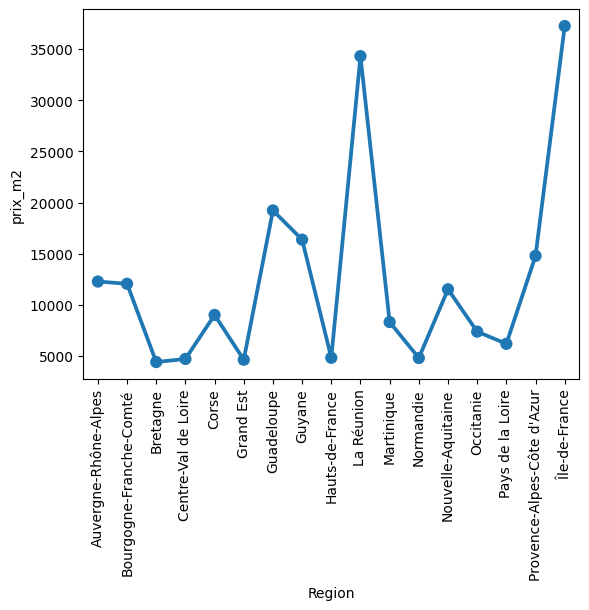

In [38]:
sns.pointplot(x=prixMoyenM2ByRegion.index,y='prix_m2',data=prixMoyenM2ByRegion)
matplotlib.pyplot.xticks(rotation = 90)

# 4°) Le classement des départements par la surface moyenne habitable

In [39]:
dfSurfaceBydepartement = df[['Surface reelle bati','Departement']]

In [40]:
dfSurfaceBydepartement['Surface reelle bati'] = dfSurfaceBydepartement['Surface reelle bati'].apply(conv_float)

/var/folders/36/gfc6l00n2tj2hpqgm8k489pc0000gn/T/ipykernel_10590/2616593347.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [41]:
franceClassement = dfSurfaceBydepartement.groupby('Departement')['Surface reelle bati'].mean().sort_values(ascending=False)
franceClassement

Departement
Eure-et-Loir       191.791818
Landes             150.551478
Haute-Loire        142.842087
Loir-et-Cher       130.127527
Aisne              123.332958
                      ...    
Paris               54.773945
Haute-Savoie        53.848939
Hauts-de-Seine      52.770721
Haute-Corse         51.159526
Alpes-Maritimes     49.348048
Name: Surface reelle bati, Length: 97, dtype: float64

In [42]:
franceTop5 = pd.DataFrame(franceClassement.head(5))
franceTop5Fig = franceTop5.style.background_gradient(cmap='Reds')\
                                .set_properties(**{'text-align':'center'})

franceLast5 = pd.DataFrame(franceClassement.tail(5))
franceLast5Fig = franceLast5.style.background_gradient(cmap='Blues')\
                                .set_properties(**{'text-align':'center'})

**Classement des 5 plus grandes surfaces par département en France**

In [43]:
franceTop5Fig

,Surface reelle bati
Departement,
Eure-et-Loir,191.791818
Landes,150.551478
Haute-Loire,142.842087
Loir-et-Cher,130.127527
Aisne,123.332958


**Classement des 5 plus petites surfaces par département en France**

In [44]:
franceLast5Fig

,Surface reelle bati
Departement,
Paris,54.773945
Haute-Savoie,53.848939
Hauts-de-Seine,52.770721
Haute-Corse,51.159526
Alpes-Maritimes,49.348048


**Carte des surfaces moyennes des logements par départment en France**

In [45]:
url = urllib.request.urlopen("https://france-geojson.gregoiredavid.fr/repo/departements.geojson")
urlReunion = urllib.request.urlopen("https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/departements/974-la-reunion/departement-974-la-reunion.geojson")
geoFrance = json.loads(url.read().decode())
geoFrance['features'].append(json.loads(urlReunion.read().decode()))


In [46]:
departementsDf = pd.DataFrame({
    "Departement" : [arr['properties']['nom'] for arr in geoFrance['features']], 
    "Surface réelle bâti" : franceClassement
})
departementsDf

,Departement,Surface réelle bâti
Departement,,
Eure-et-Loir,Aisne,191.791818
Landes,Aube,150.551478
Haute-Loire,Calvados,142.842087
Loir-et-Cher,Cantal,130.127527
Aisne,Eure-et-Loir,123.332958
...,...,...
Paris,Mayenne,54.773945
Haute-Savoie,Meurthe-et-Moselle,53.848939
Hauts-de-Seine,Deux-Sèvres,52.770721


In [47]:
franceMap = folium.Map(location = [46.603354, 1.8883335], zoom_start = 6)
franceMap.choropleth(geoFrance, key_on = "feature.properties.nom",
                 data = departementsDf, columns = ["Departement", "Surface réelle bâti"],
                 fill_color = "Spectral")
franceMap

/Users/lieshaouas/opt/anaconda3/lib/python3.9/site-packages/folium/folium.py:465: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



**Classement des surfaces par arrondisssement à Pairs**

In [48]:
dfSurfaceByArrondissement = df[['Surface reelle bati','Departement','Code departement','Code postal']]

In [49]:
dfSurfaceByArrondissement['Surface reelle bati'] = dfSurfaceByArrondissement['Surface reelle bati'].apply(conv_float)

/var/folders/36/gfc6l00n2tj2hpqgm8k489pc0000gn/T/ipykernel_10590/1744776569.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
parisClassement =  dfSurfaceByArrondissement[(dfSurfaceByArrondissement['Code departement'] == '75')].groupby('Code postal')['Surface reelle bati'].mean()

In [51]:
dfParisClassement= pd.DataFrame(parisClassement)
dfParisClassementFig = dfParisClassement.style.background_gradient(cmap='Reds')\
                                .set_properties(**{'text-align':'center'})

In [52]:
dfParisClassementFig

,Surface reelle bati
Code postal,
75001,76.172581
75002,85.861082
75003,53.869565
75004,44.068044
75005,46.897561
75006,60.796447
75007,77.447480
75008,87.983713
75009,84.148405


**Carte des surfaces moyennes des logements par arrondissements à Paris**

In [53]:
geoParis = json.load(open("./arrondissements.geojson"))

In [54]:
dfSurfaceByArrondissement = pd.DataFrame({
    "Arrondissement" : [arr["properties"]["c_ar"] for arr in geoParis["features"]], 
    "Surface réelle bâti" : parisClassement
})
dfSurfaceByArrondissement

,Arrondissement,Surface réelle bâti
Code postal,,
75001,7,76.172581
75002,11,85.861082
75003,13,53.869565
75004,4,44.068044
75005,8,46.897561
75006,18,60.796447
75007,15,77.447480
75008,3,87.983713
75009,5,84.148405


In [55]:
parisMap = folium.Map(location = [48.856578, 2.351828], zoom_start = 12)
parisMap.choropleth(geoParis, key_on = "feature.properties.c_ar",
                 data = dfSurfaceByArrondissement, columns = ["Arrondissement", "Surface réelle bâti"],
                 fill_color = "Spectral")
parisMap

/Users/lieshaouas/opt/anaconda3/lib/python3.9/site-packages/folium/folium.py:465: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



# 5°)  La Répartition du nombre de locaux industiel par régions

In [56]:
dfTypeLocalByRegion = df[['Type local' , 'Region']]

In [57]:
dfTypeLocalByRegion = dfTypeLocalByRegion[dfTypeLocalByRegion['Type local'] == 'Local industriel. commercial ou assimilé']

In [58]:
dfTypeLocalByRegion = pd.DataFrame(dfTypeLocalByRegion.groupby('Region')['Type local'].value_counts())

In [59]:
dfTypeLocalByRegion.index = [i[0] for i in dfTypeLocalByRegion.index]

array([<AxesSubplot:ylabel='Type local'>], dtype=object)

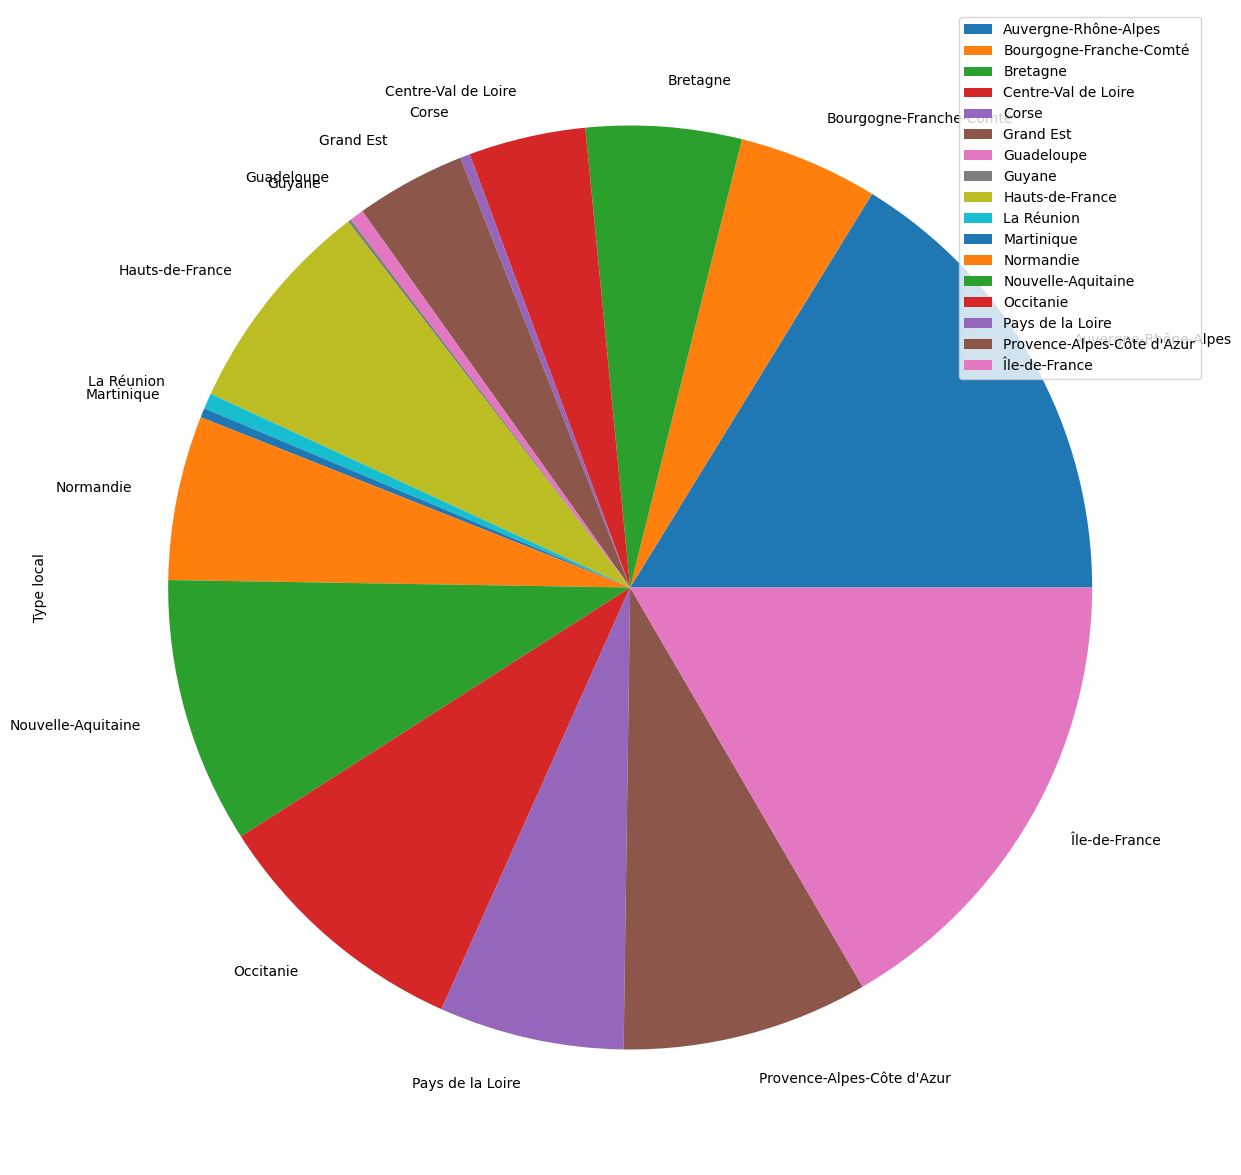

In [60]:
dfTypeLocalByRegion.plot(kind= 'pie',subplots = True, figsize =(15,15))

# 6°)  Création d'un modèle de prédiction de la valeur foncière d'un bien parisien

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import xgboost
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [100]:
df.head()

,Code service sages,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Region,Departement
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,07/01/2020,Vente,...,NaN,NaN,NaN,NaN,NaN,T,NaN,1061,Auvergne-Rhône-Alpes,Ain
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,02/01/2020,Vente,...,NaN,NaN,NaN,NaN,NaN,BT,NaN,85,Auvergne-Rhône-Alpes,Ain
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,02/01/2020,Vente,...,NaN,NaN,NaN,NaN,NaN,T,NaN,1115,Auvergne-Rhône-Alpes,Ain
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,02/01/2020,Vente,...,NaN,NaN,NaN,NaN,NaN,T,NaN,1940,Auvergne-Rhône-Alpes,Ain
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,02/01/2020,Vente,...,NaN,NaN,NaN,NaN,NaN,T,NaN,1148,Auvergne-Rhône-Alpes,Ain


In [101]:
dfModel = df[(df['Code departement'] == '75')]

In [102]:
dfModel = dfModel[["Surface reelle bati","Nombre pieces principales","Code postal","Valeur fonciere"]]

In [103]:
dfModel.dropna(inplace=True)

In [104]:
dfModel

,Surface reelle bati,Nombre pieces principales,Code postal,Valeur fonciere
3454441,24,1,75008,268800.0
3454442,43,0,75001,878378.0
3454443,66,2,75001,878378.0
3454444,51,2,75003,680000.0
3454445,19,1,75003,852000.0
...,...,...,...,...
3509079,32,2,75004,1937500.0
3509080,29,2,75004,1937500.0
3509081,40,2,75004,1937500.0
3509082,24,1,75004,1937500.0


In [109]:
dfModel['Surface reelle bati'] = dfModel['Surface reelle bati'].astype(float)

In [110]:
dfModel['Nombre pieces principales'] = dfModel['Nombre pieces principales'].astype(float)

In [130]:
dfModel['Code postal '] = dfModel['Code postal'].astype(float)

In [131]:
dfModel['Valeur fonciere'] = dfModel['Valeur fonciere'].astype(float)

In [132]:
dfModel.dtypes

Surface reelle bati          float64
Nombre pieces principales    float64
Code postal                   object
Valeur fonciere              float64
Code postal                  float64
dtype: object

In [114]:
X_train,X_test,y_train,y_test=train_test_split(dfModel.drop(['Valeur fonciere'],axis=1),
                                               dfModel[['Valeur fonciere']],test_size=0.20)

In [115]:
regr = LinearRegression()
fitregr=regr.fit(X_train, y_train)
predregrtrain=fitregr.predict(X_train)
predregrtest=fitregr.predict(X_test)

In [116]:
train_set_rmse = (np.sqrt(mean_squared_error(predregrtrain,y_train )))
train_set_r2 = r2_score(y_train, predregrtrain)
print('Linear model, R2 train score is : {} and the train root mean square is: {}'
     .format(train_set_r2,round(train_set_rmse,2)))

test_set_rmse = (np.sqrt(mean_squared_error(predregrtest,y_test )))
test_set_r2 = r2_score(y_test, predregrtest)
print('Linear model, R2 test score is : {} and the test root mean square is: {}'
     .format(test_set_r2,round(test_set_rmse,2)))

Linear model, R2 train score is : 0.09223135261878967 and the train root mean square is: 12955742.18
Linear model, R2 test score is : 0.09862033150345173 and the test root mean square is: 11266068.65


In [124]:
import pickle
with open('Paris prediction.pkl', 'wb') as file:
  pickle.dump(fitregr, file)